In [1]:
# importing libraries
import nasdaqdatalink as ndl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

C:\Users\nikik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\nikik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# pasting API key here
ndl.ApiConfig.api_key  = "bcvv5kPt-7nqGxL3yLLs"

In [5]:
# Import FREE FRED data
data = ndl.get_table("QDL/OPEC")

In [6]:
data.head(10)

,date,value
None,,
0,2024-01-25,81.98
1,2024-01-24,81.05
2,2024-01-23,81.30
3,2024-01-22,79.70
4,2024-01-19,80.27
5,2024-01-18,79.39
6,2024-01-17,78.38
7,2024-01-16,79.16
8,2024-01-15,79.17


In [7]:
data.shape

(5435, 2)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5435 non-null   datetime64[ns]
 1   value   5435 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.0 KB


In [9]:
data.index

RangeIndex(start=0, stop=5435, step=1, name='None')

In [10]:
data.columns

Index(['date', 'value'], dtype='object')

In [11]:
data.head()

,date,value
None,,
0,2024-01-25,81.98
1,2024-01-24,81.05
2,2024-01-23,81.30
3,2024-01-22,79.70
4,2024-01-19,80.27


In [12]:
# converting date to datetime
data["date"] = pd.to_datetime(data["date"])

In [13]:
data = data.set_index("date")

In [14]:
data.index

DatetimeIndex(['2024-01-25', '2024-01-24', '2024-01-23', '2024-01-22',
               '2024-01-19', '2024-01-18', '2024-01-17', '2024-01-16',
               '2024-01-15', '2024-01-12',
               ...
               '2003-01-15', '2003-01-14', '2003-01-13', '2003-01-10',
               '2003-01-09', '2003-01-08', '2003-01-07', '2003-01-06',
               '2003-01-03', '2003-01-02'],
              dtype='datetime64[ns]', name='date', length=5435, freq=None)

In [15]:
data.head()

,value
date,
2024-01-25,81.98
2024-01-24,81.05
2024-01-23,81.30
2024-01-22,79.70
2024-01-19,80.27


In [18]:
data.dtypes

value    float64
dtype: object

In [19]:
# checking missing values
data.isnull().sum()

value    0
dtype: int64

# Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data
I initially attempted to subset the series to 2000–2023, but this produced an empty subset because the dataset’s available date range does not include that period (or the index format does not match that filter). Since subsetting is only required *if necessary*, I continued the analysis using the full available historical time range in the dataset. This avoids removing valid observations and ensures the time series remains complete for decomposition and stationarity checks.

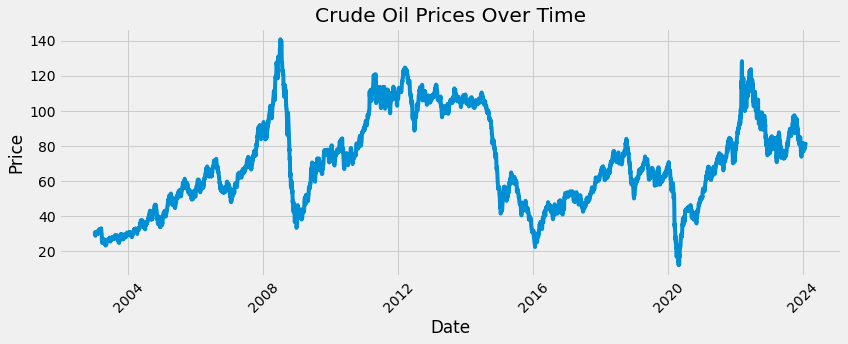

In [20]:
# creating line chart
plt.figure(figsize=(12,5))
plt.plot(data.index, data["value"])
plt.title("Crude Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation
The line chart shows strong volatility in crude oil prices over time, with several clear peaks and sharp declines. Major price increases are visible in the mid-2000s and early 2010s, followed by steep drops around 2008–2009 and again around 2014–2016. A significant decline is also visible in 2020, likely reflecting global economic disruptions, after which prices recover but remain volatile. Overall, the series displays long-term trends combined with short-term fluctuations, indicating that the data is non-stationary and influenced by economic cycles and external shocks.

In [21]:
# decompose the time series
decomposition = sm.tsa.seasonal_decompose(data['value'],model='additive',period=365)

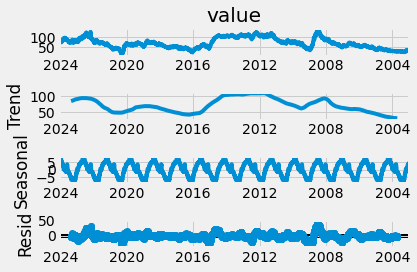

In [22]:
decomposition.plot()
plt.show()

# 
The decomposition of crude oil prices reveals several important components of the time series. The **trend** component shows long-term movements in oil prices, including a gradual increase leading up to the early 2010s, followed by a decline and periods of recovery. This indicates that oil prices are influenced by long-term economic and geopolitical factors rather than remaining stable over time.

The **seasonal** component displays a repeating cyclical pattern, suggesting that oil prices are affected by recurring seasonal factors such as changes in energy demand across the year. Although the seasonal effect is smaller in magnitude than the trend, it is consistent and clearly observable.

The **residual (noise)** component represents short-term fluctuations that are not explained by the trend or seasonality. Most residual values remain relatively small, indicating that the additive decomposition captures the main structure of the data well. However, some spikes are visible, likely corresponding to unexpected market shocks or global events.

Overall, the decomposition confirms that the crude oil price series is **non-stationary**, driven primarily by its long-term trend and recurring seasonal patterns. This suggests that further steps, such as differencing, will be required before performing reliable forecasting.

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
# Dickey-Fuller test
adf_result = adfuller(data['value'])

print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Number of Lags Used:", adf_result[2])
print("Number of Observations Used:", adf_result[3])

print("\nCritical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Test Statistic: -2.526204728927788
p-value: 0.1092279115685989
Number of Lags Used: 31
Number of Observations Used: 5403

Critical Values:
   1%: -3.431560884603653
   5%: -2.8620750888414417
   10%: -2.5670548269288087


# Interpretation
The null hypothesis (H₀) of the Dickey–Fuller test states that the time series contains a unit root and is therefore **non-stationary**. The alternative hypothesis (H₁) is that the series is stationary.

In this analysis, the ADF test statistic is **-2.53**, which is **higher than** the critical values at the 1%, 5%, and 10% significance levels. Additionally, the p-value is **0.109**, which is greater than the commonly used threshold of 0.05. As a result, the null hypothesis cannot be rejected.

These results indicate that the crude oil price time series is **non-stationary**. This finding aligns with the earlier decomposition results, which showed a strong trend component in the data. Therefore, the time series must be transformed—such as through differencing—before it can be used for reliable forecasting.

In [25]:
# First-order differencing
data_diff = data['value'].diff()

In [26]:
# Drop missing value created by differencing
data_diff = data_diff.dropna()

In [27]:
# repeating step 6(dickery step)
adf_result = adfuller(data_diff)

print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Number of Lags Used:", adf_result[2])
print("Number of Observations Used:", adf_result[3])

print("\nCritical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Test Statistic: -10.602302100749744
p-value: 6.12664270707679e-19
Number of Lags Used: 30
Number of Observations Used: 5403

Critical Values:
   1%: -3.431560884603653
   5%: -2.8620750888414417
   10%: -2.5670548269288087


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 720x288 with 0 Axes>

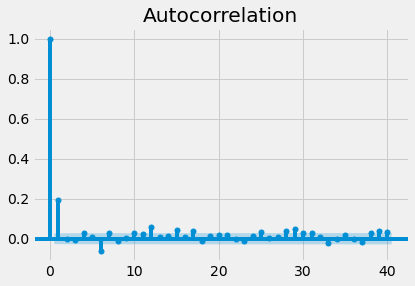

In [30]:
# checking data's autocorrelation
plt.figure(figsize=(10,4))
plot_acf(data_diff, lags=40)
plt.show()


# Insight

The autocorrelation plot shows that, after differencing, most lag values fall within the confidence interval, indicating minimal remaining autocorrelation in the series. Combined with the highly significant Dickey-Fuller test results, this confirms that the data is now stationary. This means the underlying trend has been successfully removed, making the time series suitable for reliable forecasting and further time series modeling.